## Importing Libraries,Dataset

In [2]:
import nltk
nltk.download('stopwords')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
train_bodies=pd.read_csv('train_bodies.csv')
train_stances=pd.read_csv('train_stances.csv')

In [4]:
train_data=pd.merge(train_bodies,train_stances,how='left',on='Body ID')

In [5]:
test_stance = pd.read_csv('competition_test_stances.csv')
test_body = pd.read_csv('test_bodies.csv')

In [6]:
test_data  = pd.merge( test_body, test_stance,how='left', on='Body ID')

In [7]:
target={'unrelated':0, 'agree':1, 'discuss':2, 'disagree':3}
train_data['Stance']=train_data['Stance'].map(target)

In [8]:
train_data

,Body ID,articleBody,Headline,Stance
0,0,A small meteorite crashed into a wooded area i...,"Soldier shot, Parliament locked down after gun...",0
1,0,A small meteorite crashed into a wooded area i...,Tourist dubbed ‘Spider Man’ after spider burro...,0
2,0,A small meteorite crashed into a wooded area i...,Luke Somers 'killed in failed rescue attempt i...,0
3,0,A small meteorite crashed into a wooded area i...,BREAKING: Soldier shot at War Memorial in Ottawa,0
4,0,A small meteorite crashed into a wooded area i...,Giant 8ft 9in catfish weighing 19 stone caught...,0
...,...,...,...,...
49967,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets tipped more than $2,00...",1
49968,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets $2,000 tip",1
49969,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Luckiest Pizza Delivery Guy Ever Gets $2,000 Tip",1
49970,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...",Ann Arbor pizza delivery driver surprised with...,1


## Data Preprocessing

In [9]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import string
stop_words=set(stopwords.words('english'))
stemmer = PorterStemmer()
def preprocessing(text):
    
    text = text.rstrip(',|.|;|:|\'|\"')
    text = text.lstrip('\'|\"')
    #remove numbers
    text=re.sub(r'\d+','',text)
    #punctuation removal
    translator=str.maketrans('','',string.punctuation)
    text=text.translate(translator)
    text=" ".join(text.split())
    #stop words removal
    word_tokens=word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    text=" ".join(filtered_text)
    #stemming
    word_tokens = word_tokenize(text)
    stems = [stemmer.stem(word) for word in word_tokens]
    text=" ".join(stems)
    #lowering the text
    text=text.lower()
    
    return text

In [10]:
train_data['new_headline']=train_data['Headline'].map(preprocessing)

In [11]:
train_data['new_articlebody']=train_data['articleBody'].map(preprocessing)

In [12]:
test_data['new_Headline']=test_data['Headline'].map(preprocessing)
test_data['new_articlebody']=test_data['articleBody'].map(preprocessing)

In [13]:
test_data['Stance']=test_data['Stance'].map(target)

In [14]:
#preprocessed train data
xtrain_prepdata=train_data[['new_headline','new_articlebody']]
ytrain_prepdata=train_data['Stance']
#unpreprocessed train data
xtrain_unprepdata=train_data[['Headline','articleBody']]
ytrain_unprepdata=train_data['Stance']
#preprocessed text  data
xtest_prepdata=test_data[['new_Headline','new_articlebody']]
ytest_prepdata=test_data['Stance']
#unpreprocessed text data
xtest_unprepdata=test_data[['Headline','articleBody']]
ytest_unprepdata=test_data['Stance']

## Text to Sequence and Word Embedding

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize
X_train_prep_combined = train_data['new_headline'] + train_data['new_articlebody']
X_train_prep_combined = pd.DataFrame(X_train_prep_combined)
X_train_prep_combined.columns = ['combined']
tokens1=[]
def tokens(text):
    tokens=word_tokenize(text)
    tokens1.append(tokens)
X_train_prep_combined['combined'].apply(tokens)
tokenizer = Tokenizer(num_words=len(tokens1))
tokenizer.fit_on_texts(X_train_prep_combined['combined'])
words_to_index = tokenizer.word_index

In [49]:
words_to_index

{'’': 1,
 'the': 2,
 'said': 3,
 '“': 4,
 '”': 5,
 'report': 6,
 'i': 7,
 'new': 8,
 'state': 9,
 'video': 10,
 'one': 11,
 'us': 12,
 'say': 13,
 'appl': 14,
 'isi': 15,
 'time': 16,
 'it': 17,
 'would': 18,
 'peopl': 19,
 'also': 20,
 'told': 21,
 'he': 22,
 'islam': 23,
 'group': 24,
 'claim': 25,
 'man': 26,
 'a': 27,
 'offici': 28,
 'watch': 29,
 'year': 30,
 'could': 31,
 'like': 32,
 'in': 33,
 'accord': 34,
 'show': 35,
 'kill': 36,
 'use': 37,
 'last': 38,
 'we': 39,
 'kim': 40,
 'govern': 41,
 'offic': 42,
 'milit': 43,
 'polic': 44,
 'first': 45,
 'releas': 46,
 'name': 47,
 'syria': 48,
 '—': 49,
 'post': 50,
 'foley': 51,
 'two': 52,
 'american': 53,
 'stori': 54,
 'day': 55,
 'media': 56,
 'confirm': 57,
 'but': 58,
 'come': 59,
 'iraq': 60,
 'make': 61,
 'sourc': 62,
 'shot': 63,
 'even': 64,
 'go': 65,
 'may': 66,
 'forc': 67,
 'north': 68,
 'appear': 69,
 'includ': 70,
 'week': 71,
 'attack': 72,
 'work': 73,
 'citi': 74,
 'secur': 75,
 'get': 76,
 'believ': 77,
 'made

In [17]:
def read_glove_vector(glove_vec):
  with open(glove_vec, 'r', encoding='UTF-8') as f:
    words = set()
    word_to_vec_map = {}
    for line in f:
      w_line = line.split()
      curr_word = w_line[0]
      word_to_vec_map[curr_word] = np.array(w_line[1:], dtype=np.float64)
  return word_to_vec_map

In [18]:
word_to_vec_map = read_glove_vector('glove.6B.100d.txt')

In [19]:
vocab_len = len(words_to_index)
embed_vector_len = word_to_vec_map['moon'].shape[0]

emb_matrix = np.zeros((vocab_len, embed_vector_len))

for word, index in words_to_index.items():
  embedding_vector = word_to_vec_map.get(word)
  if embedding_vector is not None:
    emb_matrix[index, :] = embedding_vector


In [20]:
count=[]
def max_len(text):
    count.append(len(text.split()))
X_train_prep_combined['combined'].apply(max_len)
max(count)

2900

In [21]:
from keras.utils import pad_sequences
head = tokenizer.texts_to_sequences(X_train_prep_combined['combined'])
head = pad_sequences(head, maxlen=max(count), padding='post')
head

array([[  264,    63,   318, ...,     0,     0,     0],
       [ 2420,  2610,   120, ...,     0,     0,     0],
       [ 1575,   926,    36, ...,     0,     0,     0],
       ...,
       [15336,  2028,  1776, ...,     0,     0,     0],
       [ 4164,  4682,  2028, ...,     0,     0,     0],
       [ 4164,  4682,  2028, ...,     0,     0,     0]])

In [22]:
head.shape

(49972, 2900)

In [50]:
emb_matrix

array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [-0.026284,  0.017938, -0.50165 , ..., -0.8688  ,  0.94094 ,
        -0.28815 ],
       [-0.038194, -0.24487 ,  0.72812 , ..., -0.1459  ,  0.8278  ,
         0.27062 ],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.75891 ,  0.91641 , -0.98818 , ..., -0.03736 , -0.20129 ,
         0.1903  ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ]])

## CNN-LSTM Model

In [23]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Embedding, Input, Lambda, LSTM, Bidirectional
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling1D
from keras.layers import concatenate

In [24]:
train_head = tokenizer.texts_to_sequences(train_data['new_headline'])
train_head = pad_sequences(train_head, maxlen=30, padding='post')
train_body = tokenizer.texts_to_sequences(train_data['new_articlebody'])
train_body = pad_sequences(train_body, maxlen=500, padding='post')
test_head = tokenizer.texts_to_sequences(test_data['new_Headline'])
test_head = pad_sequences(test_head, maxlen=30, padding='post')
test_body = tokenizer.texts_to_sequences(test_data['new_articlebody'])
test_body = pad_sequences(test_body, maxlen=500, padding='post')

In [25]:
train_head

array([[  264,    63,   318, ...,     0,     0,     0],
       [ 2420,  2610,   120, ...,     0,     0,     0],
       [ 1575,   926,    36, ...,     0,     0,     0],
       ...,
       [15336,  2028,  1776, ...,     0,     0,     0],
       [ 4164,  4682,  2028, ...,     0,     0,     0],
       [ 4164,  4682,  2028, ...,     0,     0,     0]])

In [26]:
from keras.layers import Reshape
head_input = Input(shape=(30,), dtype='int32', name='head_input')
body_input = Input(shape=(500,), dtype='int32', name='body_input')
embedding_layer = Embedding(len(words_to_index),100,weights=[emb_matrix],input_length=max(count),trainable=False)
head_embed = embedding_layer(head_input)
body_embed = embedding_layer(body_input)

pool_1 = MaxPooling1D(pool_size=3, strides=2, name='pool3')
conv_1 = Conv1D(64, 5, activation='relu', name='conv1')
head_CNN = conv_1(head_embed)
head_CNN = pool_1(head_CNN)
head_CNN = Flatten()(head_CNN)
conv_2 = Conv1D(64, 5, activation='relu', name='conv2')
body_CNN = conv_2(body_embed)
body_CNN = pool_1(body_CNN)
body_CNN = Flatten()(body_CNN)
conc = concatenate([head_CNN,body_CNN])

lstm_input = Reshape((-1, conc.shape[1]))(conc)
lstm = LSTM(100)(lstm_input)

dense = Dense(100,activation='relu')(lstm)
dense = Dropout(0.3)(dense)
dense = Dense(4,activation='softmax')(dense)
model = Model(inputs=[head_input,body_input], outputs=[dense])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['acc'])
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 head_input (InputLayer)        [(None, 30)]         0           []                               
                                                                                                  
 body_input (InputLayer)        [(None, 500)]        0           []                               
                                                                                                  
 embedding (Embedding)          multiple             4042300     ['head_input[0][0]',             
                                                                  'body_input[0][0]']             
                                                                                                  
 conv1 (Conv1D)                 (None, 26, 64)       32064       ['embedding[0][0]']          

In [27]:
model.fit([train_head,train_body],ytrain_prepdata,validation_data = ([test_head,test_body],ytest_prepdata),epochs=4, batch_size=128,verbose = True)

Epoch 1/4
391/391 [==============================] - 258s 640ms/step - loss: 0.6416 - acc: 0.7755 - val_loss: 0.8001 - val_acc: 0.6980
Epoch 2/4
391/391 [==============================] - 234s 600ms/step - loss: 0.3536 - acc: 0.8675 - val_loss: 0.9112 - val_acc: 0.6828
Epoch 3/4
391/391 [==============================] - 235s 601ms/step - loss: 0.2420 - acc: 0.9073 - val_loss: 1.0257 - val_acc: 0.6561
Epoch 4/4
391/391 [==============================] - 233s 597ms/step - loss: 0.1740 - acc: 0.9334 - val_loss: 1.2287 - val_acc: 0.6880


In [28]:
model.evaluate([test_head,test_body],ytest_prepdata)

795/795 [==============================] - 41s 52ms/step - loss: 1.2287 - acc: 0.6880


[1.2286969423294067, 0.6880336999893188]

In [29]:
y_pred = model.predict([test_head,test_body])

795/795 [==============================] - 43s 53ms/step


In [30]:
labels = np.argmax(y_pred, axis=-1)    
print(labels)

[0 0 0 ... 2 2 0]


In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest_prepdata,labels)
cm

array([[15691,  1401,  1252,     5],
       [ 1139,   501,   263,     0],
       [ 2758,   416,  1289,     1],
       [  489,   118,    86,     4]], dtype=int64)

<AxesSubplot:>

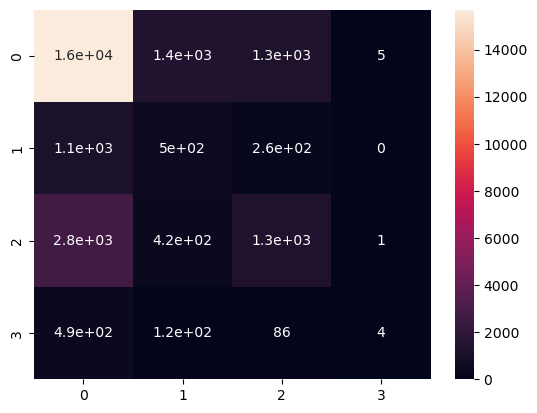

In [32]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [33]:
pad_shape = max(count)
pad_shape

2900

In [53]:
train_head1 = tokenizer.texts_to_sequences(train_data['new_headline'])
train_head1 = pad_sequences(train_head, maxlen=pad_shape, padding='post')
train_body1 = tokenizer.texts_to_sequences(train_data['new_articlebody'])
train_body1 = pad_sequences(train_body, maxlen=pad_shape, padding='post')
test_head1 = tokenizer.texts_to_sequences(test_data['new_Headline'])
test_head1 = pad_sequences(test_head, maxlen=pad_shape, padding='post')
test_body1 = tokenizer.texts_to_sequences(test_data['new_articlebody'])
test_body1 = pad_sequences(test_body, maxlen=pad_shape, padding='post')

In [51]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [54]:
test = SelectKBest(score_func=chi2, k=30)
x_head = test.fit_transform(train_head1, ytrain_prepdata)

In [55]:
test = SelectKBest(score_func=chi2, k=500)
x_body = test.fit_transform(train_body1, ytrain_prepdata)

In [56]:
test = SelectKBest(score_func=chi2, k=30)
x_test_head = test.fit_transform(test_head1, ytest_prepdata)

In [57]:
test = SelectKBest(score_func=chi2, k=500)
x_test_body = test.fit_transform(test_body1, ytest_prepdata)

In [58]:
from keras.layers import Reshape
head_input = Input(shape=(30,), dtype='int32', name='head_input')
body_input = Input(shape=(500,), dtype='int32', name='body_input')
embedding_layer = Embedding(len(words_to_index),100,weights=[emb_matrix],input_length=max(count),trainable=False)
head_embed = embedding_layer(head_input)
body_embed = embedding_layer(body_input)
pool_1 = MaxPooling1D(pool_size=3, strides=2, name='pool3')
conv_1 = Conv1D(64, 5, activation='relu', name='conv1')
head_CNN = conv_1(head_embed)
head_CNN = pool_1(head_CNN)
head_CNN = Flatten()(head_CNN)
conv_2 = Conv1D(64, 5, activation='relu', name='conv2')
body_CNN = conv_2(body_embed)
body_CNN = pool_1(body_CNN)
body_CNN = Flatten()(body_CNN)
conc = concatenate([head_CNN,body_CNN])

lstm_input = Reshape((-1, conc.shape[1]))(conc)
lstm = LSTM(100)(lstm_input)

dense = Dense(100,activation='relu')(lstm)
dense = Dropout(0.3)(dense)
dense = Dense(4,activation='softmax')(dense)
model = Model(inputs=[head_input,body_input], outputs=[dense])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['acc'])
print(model.summary())

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 head_input (InputLayer)        [(None, 30)]         0           []                               
                                                                                                  
 body_input (InputLayer)        [(None, 500)]        0           []                               
                                                                                                  
 embedding_6 (Embedding)        multiple             4042300     ['head_input[0][0]',             
                                                                  'body_input[0][0]']             
                                                                                                  
 conv1 (Conv1D)                 (None, 26, 64)       32064       ['embedding_6[0][0]']      

In [64]:
model.fit([x_head,x_body],ytrain_prepdata,validation_data = ([x_test_head,x_test_body],ytest_prepdata),epochs=4, batch_size=128,verbose = True)

Epoch 1/4
391/391 [==============================] - 250s 627ms/step - loss: 0.6691 - acc: 0.7689 - val_loss: 0.7991 - val_acc: 0.7139
Epoch 2/4
391/391 [==============================] - 171s 436ms/step - loss: 0.3802 - acc: 0.8586 - val_loss: 0.9178 - val_acc: 0.6632
Epoch 3/4
391/391 [==============================] - 125s 319ms/step - loss: 0.2604 - acc: 0.9001 - val_loss: 0.9806 - val_acc: 0.6697
Epoch 4/4
391/391 [==============================] - 132s 339ms/step - loss: 0.1916 - acc: 0.9260 - val_loss: 1.1447 - val_acc: 0.6531


In [65]:
cm

array([[15691,  1401,  1252,     5],
       [ 1139,   501,   263,     0],
       [ 2758,   416,  1289,     1],
       [  489,   118,    86,     4]], dtype=int64)

In [75]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components = 30)
pca1.fit(train_head1)

In [77]:
train_head2 = pca1.transform(train_head1)

array([[   92.41469276, -1823.39775275,  2206.80085588, ...,
            0.        ,     0.        ,     0.        ],
       [  476.6757287 ,  2062.05270568,  -430.68122853, ...,
            0.        ,     0.        ,     0.        ],
       [ -181.67042903,   998.53168935,   609.11909756, ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [ 8980.22135286, 10741.76107284,  1047.030913  , ...,
            0.        ,     0.        ,     0.        ],
       [ 3980.97851074,  2162.18261461,  -387.82560944, ...,
            0.        ,     0.        ,     0.        ],
       [ 3980.97851074,  2162.18261461,  -387.82560944, ...,
            0.        ,     0.        ,     0.        ]])

In [78]:
test_head2 = pca1.transform(test_head1)

array([[ 1038.92409867, -1151.04487904,  1892.09513375, ...,
            0.        ,     0.        ,     0.        ],
       [ 3310.54851173, -2472.69059494,  2124.37631834, ...,
            0.        ,     0.        ,     0.        ],
       [ -646.34516133,  -817.31102462, -1087.40484713, ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [-1020.28863416,   717.52338328,  -868.227715  , ...,
            0.        ,     0.        ,     0.        ],
       [-1161.87267129,  1762.6376266 ,    77.29660286, ...,
            0.        ,     0.        ,     0.        ],
       [ 5355.90201256, -5621.39990429, -7558.09040077, ...,
            0.        ,     0.        ,     0.        ]])

In [80]:
pca2 = PCA(n_components = 500)
pca2.fit(train_body1)

PCA(n_components=500)

In [81]:
train_body2 = pca2.transform(train_body1)

In [82]:
test_body2 = pca2.transform(test_body1)